# Homework
We need to solve the equations arrays:

$$
\begin{eqnarray}
x_{1}^2+x_{1}x_{2}=10\\
x_{2}+3x_{1}x_{2}^2=57
\end{eqnarray}
$$

First we need to derive the partial derivative of the equation arrays;
we shall do it analytically:

$$
\frac{\partial f_1}{\partial x_1} = 2x_1 + x_2\\
\frac{\partial f_1}{\partial x_2} = x_1\\
\frac{\partial f_2}{\partial x_1} = 3x_2^2 \\
\frac{\partial f_2}{\partial x_2} = 1 + 6x_1 x_2
$$

Following that $a = \frac{\partial f_1}{\partial x_1}$, $b = \frac{\partial f_1}{\partial x_2}$, $c = \frac{\partial f_2}{\partial x_1}$, and $d = \frac{\partial f_2}{\partial x_2}$, we can solve for $\Delta x_1$ and $\Delta x_2$ using the equations:

$$
\Delta x_1=\frac{bf_2-df_1}{ad-bc}\\
\Delta x_2=\frac{cf_1-af_2}{ad-bc}
$$

Now we can implement the newton raphson method 

In [2]:
#Let's define the original functions we have to solve for:

def f_1(x_1,x_2):
    return x_1**2 + x_1*x_2 - 10
    
def f_2 (x_1,x_2):
    return x_2 + 3*x_1*(x_2**2) - 57

#First we use some random x_1 & x_2 
x_1 = -1
x_2 = 1
nmax = 100
#y_values

def newt_raphs(x_1,x_2, nmax):
    delx_1 = 0
    delx_2 = 0
    for i in range(1,nmax+1):
        #Calculate y values
        x_1 += delx_1
        x_2 += delx_2
        val_1 = f_1 (x_1,x_2)
        val_2 = f_2(x_1,x_2)
        if(val_1 == val_2 == 0):
            print("Minimum found at iteration ",i)
            break
        #Then we calculate the equations for \Delta x_1, \Delta x_2
        a =2*x_1 + x_2
        b = x_1
        c = 3*(x_2**2)
        d = 1+6*x_1*x_2
        delx_1 = (b*(val_2) - d*(val_1))/((a)*(d) - (c)*(b))
        delx_2 = (c*(val_1) - a*(val_2))/((a)*(d) - (c)*(b))

    print("Value of f_1 at (",x_1,",",x_2,"): ",f_1(x_1,x_2))
    print("Value of f_2 at (",x_1,",",x_2,"): ",f_2(x_1,x_2))
    return val_1, val_2,x_1,x_2

newt_raphs(x_1,x_2,nmax)


Minimum found at iteration  22
Value of f_1 at ( 2.0 , 3.0 ):  0.0
Value of f_2 at ( 2.0 , 3.0 ):  0.0


(0.0, 0.0, 2.0, 3.0)

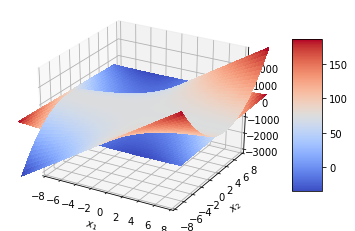

In [5]:
"""
Confirm that our solution is correct via graph
(We can also verify by plugging in the solutions)
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

x_1 = np.linspace(-10,10,100)
x_2 = np.linspace (-10,10,100)
X_1,X_2 = np.meshgrid(x_1,x_2)

Z_1 = f_1(X_1,X_2)
Z_2 = f_2(X_1,X_2)

# Plot the surface.
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(X_1, X_2, Z_1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
surf_2 = ax.plot_surface(X_1,X_2,Z_2, cmap = cm.coolwarm,linewidth=0,antialiased=False)
fig.colorbar(surf, shrink=0.7, aspect=5)
# Add a color bar which maps values to colors.
ax.set_xlim(-8,8)
ax.set_ylim(-8,8)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
plt.show()

It's not easy to see, but the values begin to meet towards the values that we originally sought. Thus, our solution is accurate
